# Moto di una cometa


Simulare il moto della cometa di Halley con algoritmo velocity-Verlet. Le equazioni del moto sono:


$$ \dot{r} = v \; \; \; \; \; \; \; \; \; \; \; \; \; \; \dot{v} = − \frac{GM}{|r|^3}r  $$


Prendendo come unità di misura della lunghezza il semiasse maggiore $ l_0 = 2.68 × 10^{12} $ m, e come unità di misura
del tempo il periodo di rivoluzione $ t_0 = 75.32 $ y $ = 2.38 × 10^9 $ s, si ha $ GM = 4\pi^2 \simeq 39.48 $, la distanza dal 
sole all’afelio $ r_{max} = 1.97 $, e la velocità all’afelio $ v_{min} = 0.816 $. Impostare quindi le condizioni iniziali all’afelio


$$ r(0) = 1.97,0 \; \; \; \; \; \; \; \; \; \; \; \; \; \; v(0) = 0, 0.816 $$


e simulare con passo temporale $ \Delta t = 10^{−4} $ (corrispondente a circa $ 66 $ ore).
Verificare che l’energia (divisa per la massa della cometa)


$$ \frac{H}{m} = − \frac{GM}{|r|}+\frac{1}{2}{|v|^2} $$


rimanga in media costante. Verificare che le fluttuazioni attorno alla media dell’energia diminuiscano al diminuire di 
$\Delta$t.


Il seguente codice implementa l'algoritmo richiesto per un tempo di $ 10 $ rivoluzioni. In output sono riportati i grafici della traiettoria della cometa nel piano $ xy $ e l'andamento dell'energia divisa per la massa. Sono inoltre riportati il valore iniziale dell' Energia (diviso la massa) e la differenza fra quest'ultimo e il valore medio dell'energia durante l'intera simulazione. 

-19.707681137055836 
 0.000863134723936


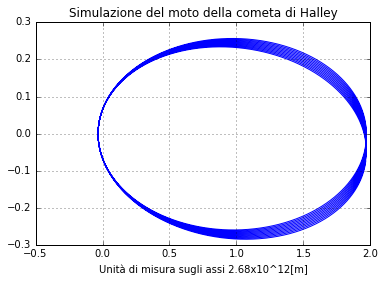

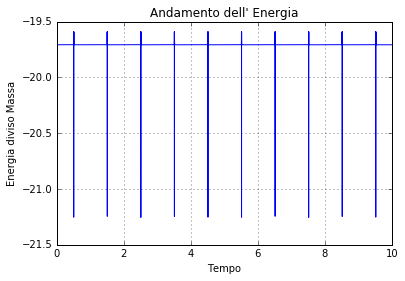

In [1]:
%matplotlib inline    
                                                          #Comando magico, permette di stampare i risultati nel notebook
import matplotlib.pyplot as mpl                           #Importa le librerie necessarie
import math
import numpy

h = pow(10, -4)                                           #Imposta il passo temporale
L = h
t = [0]

GM = 39.48

x = [1.97]                                                #Imposta le condizioni iniziali
y = [0]

vx = [0]
vy = [0.816]

r = [math.sqrt(x[0] ** 2 + y[0] ** 2)]                    #Calcola, nel punto iniziale, raggio modulo della velocità, energia
v = [math.sqrt(vx[0] ** 2 + vy[0] ** 2)]                  #diviso la massa e le componenti della forza

E = [-GM / r[0] + 0.5 * pow(v[0], 2)]

Fx = [-GM*x[0]/r[0]**3]
Fy = [-GM*y[0]/r[0]**3]

for i in range(1, 100001):                                #Questo ciclo implementa l'algoritmo di velocity-Verlet

    x.append(x[i-1]+vx[i-1]*h+0.5*Fx[i-1]*pow(h, 2))
    y.append(y[i-1]+vy[i-1]*h+0.5*Fy[i-1]*pow(h, 2))      #Calcola la posizione al passo i, conoscendo il passo i-1

    r.append(math.sqrt(x[i]**2+y[i]**2))                  #Calcola la distanza fra la cometa e il sole

    Fx.append(-GM*x[i]/r[i]**3)
    Fy.append(-GM*y[i]/r[i]**3)                           #Calcola la forza al passo i, conoscendo il passo i-1

    vx.append(vx[i-1]+0.5*(Fx[i-1]+Fx[i])*h)
    vy.append(vy[i-1]+0.5*(Fy[i-1]+Fy[i])*h)              #Calcola la velocità al passo i, conoscendo il passo i-1

    v.append(math.sqrt(vx[i]**2+vy[i]**2))                #Calcola il modulo quadro di v al passo i

    E.append(-GM / r[i] + 0.5 * pow(v[i], 2))             #Calcola l'energia, diviso la massa, al passo i

    t.append(L)
    L += h                                                #Fa avanzare il vettore temporale


print(E[0], "\n", E[0]-numpy.mean(E))                     #Stampa il valore iniziale dell'energia, diviso la massa e la
                                                          #differenza di quest ultima con il valore medio assunto durante
mpl.figure()                                              #la simulazione
mpl.plot(x, y)
mpl.title("Simulazione del moto della cometa di Halley")  #Stampa il moto della cometa nel piano xy
mpl.xlabel("Unità di misura sugli assi 2.68x10^12[m]")
mpl.grid()

mpl.figure()                                              #Stampa l'andamento dell'energia in funzione del tempo
mpl.plot(t, E)
mpl.title("Andamento dell' Energia")
mpl.xlabel("Tempo")
mpl.ylabel("Energia diviso Massa")
mpl.grid()

mpl.show()

Se ora si fa girare nuovamente il programma ma utilizzando un passo temporale di $ 10^{-5} $ ed eseguendo $ 1000001 $ 
cicli otteniamo i seguenti risultati:

-19.707681137055836 
 8.69381322843e-06


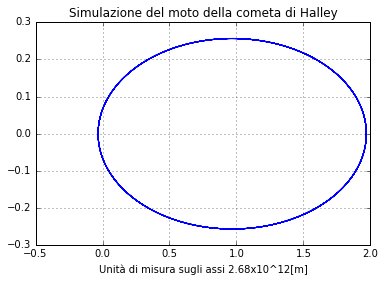

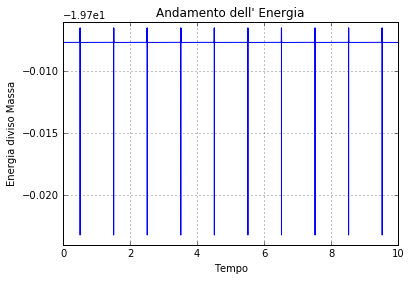

Mentre se si una un passo temporale di $ 10^-6 $ eseguendo $ 10000001 $ cicli otteniamo i seguenti risultati:

-19.707681137055836 
 8.69529692693e-08


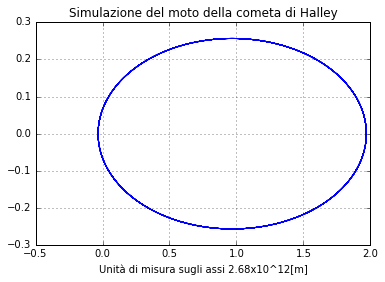

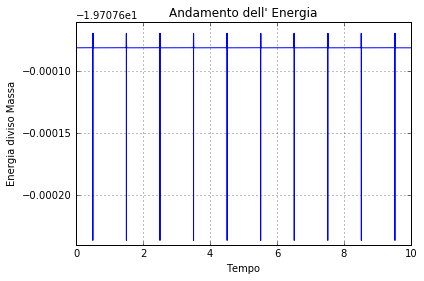

Come si può evincere dai grafici, al diminuire del passo temporale la soluzione è più accurata. Le orbite tracciate da rivoluzioni successive si avvicinano sempre più e le fluttuazioni attorno al valore medio dell'energia diminuiscono.

Per comprendere l'andamento dell' grafico dell' Energia, possiamo graficare il raggio e la velcità in funzione del tempo

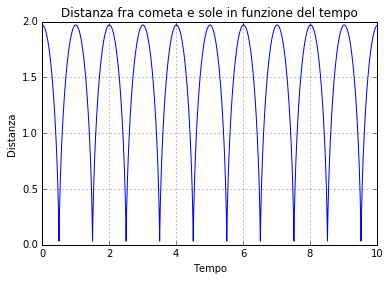

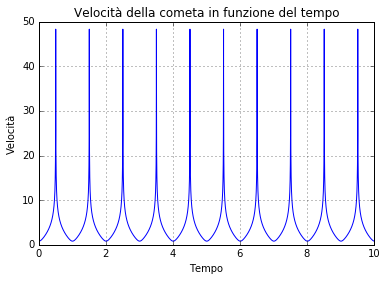

In [7]:
mpl.figure()
mpl.plot(t,r)
mpl.title("Distanza fra cometa e sole in funzione del tempo")
mpl.xlabel("Tempo")
mpl.ylabel("Distanza")
mpl.grid()

mpl.figure()
mpl.plot(t,v)
mpl.title("Velocità della cometa in funzione del tempo")
mpl.xlabel("Tempo")
mpl.ylabel("Velocità")
mpl.grid()

mpl.show()

E' evidente che in prossimità del perielio la velocità ha un picco estremamente pronunciato. In prossimità di questi picchi l'algoritmo è meno efficace.